# MD NVE - Fase solida 
### $T=0.8$, $\rho=1.2$

## Equilibrazione
Di seguito si mostrano i seguenti grafici, in cui le quantità sono riportate in unità ridotte:

1. temperatura istantanea in funzione del tempo di integrazione per tutta la durata della simulazione ($10^4 passi$). La temperatura iniziale viene impostata uguale a quella target $T^*$ e il sistema viene fatto evolvere senza riscalamenti;
2. temperatura istantanea in funzione del tempo di integrazione durante l'equilibrazione forzata. Il numero di passi tra un riscalamento e il successivo è stato scelto osservando l'andamento del grafico 1. Gli ultimi 1000 passi corrispondono ai $10^4$ passi di simulazione, durante la quale la temperatura è stata misurata ogni 10 intervalli di tempo.

Configurazione di partenza: fcc (configurazione che minimizza il potenziale). 

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from decimal import Decimal as d

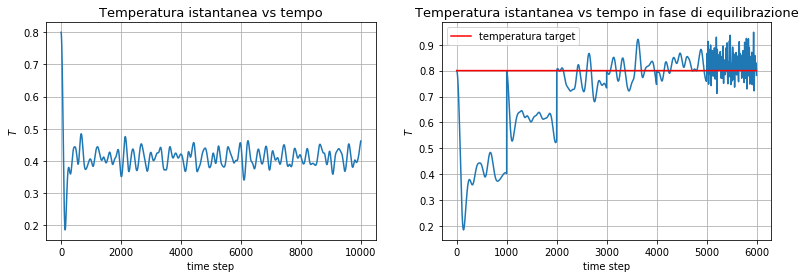

In [2]:
# Equilibrazione: T vs t
T_inst = np.loadtxt("Solid/Instant/instant_temp0.txt", usecols=(0), unpack = 'true')
T_eq = np.loadtxt("Solid/Instant/instant_temp.txt", usecols=(0), unpack = 'true')

L = len(T_inst)
t1 = np.arange(L)
L = len(T_eq)
t2 = np.arange(L)
T_solid = 0.8*np.ones(L)


f = plt.figure(figsize=(13,4))

f.add_subplot(1,2,1)
plt.plot(t1,T_inst)
plt.xlabel('time step')
plt.ylabel('$T$')
plt.title('Temperatura istantanea vs tempo',size=13)
plt.grid()

f.add_subplot(1,2,2)
plt.plot(t2,T_eq)
plt.plot(t2,T_solid,label='temperatura target',color='r')
plt.xlabel('time step')
plt.ylabel('$T$')
plt.title('Temperatura istantanea vs tempo in fase di equilibrazione',size=13)
plt.legend()
plt.grid()

plt.show()

Equilibrazione a $T=0.8$ con almeno 3 ripetizioni da 1000 passi. 

Dai due grafici si evince che durante i primi passi della simulazione la temperatura crolla bruscamente, per poi assestarsi attorno ad un valor medio. Ciò accade perchè il solido è nella configurazione iniziale di minimo del potenziale: spostandosi dalla zona di minimo l'energia potenziale aumenta e l'energia cinetica (e quindi la temperatura)- per la conservazione dell'energia totale - diminuisce.

## Simulazione

Dopo aver equilibrato il sistema alla temperatura $T^*=0.8$ è stata effettuata la simulazione per $10^4$ passi - con passo di $0.0005$ - divisi in $100$ blocchi. Di seguito sono riportati i grafici con gli andamenti medi di energia potenziale, energia cinetica, energia totale (per particella), temperatura e pressione in funzione del tempo di integrazione. Le varie grandezze sono state riscalate utilizzando i valori di $\sigma$, $\epsilon$ e $m$ relativi all'Argon e al Krypton (presentati nel jupyter "Introduzione.ipynb") e presentate in unità del SI.

In [3]:
k_B = 1.38065*10**(-23) # J/K
amu = 1.661*10**(-27) # kg/amu

# ARGON: unità di misura SI
sigma_A = 0.34*10**(-9) # m
epsilon_A = 120*k_B # J
T_A = 120 # K
m_A = 39.948*amu # kg
tau_A = sigma_A*m_A**(1/2)*epsilon_A**(-1/2) # s
p_A = epsilon_A*sigma_A**(-3) # Pa

# KRYPTON: unità SI
sigma_K = 0.364*10**(-9) # m
epsilon_K = 164*k_B # J
T_K = 164 # K
m_K = 83.798*amu # kg
tau_K = sigma_K*m_K**(1/2)*epsilon_K**(-1/2) # s
p_K = epsilon_K*sigma_K**(-3) # Pa

### Energia potenziale media per particella

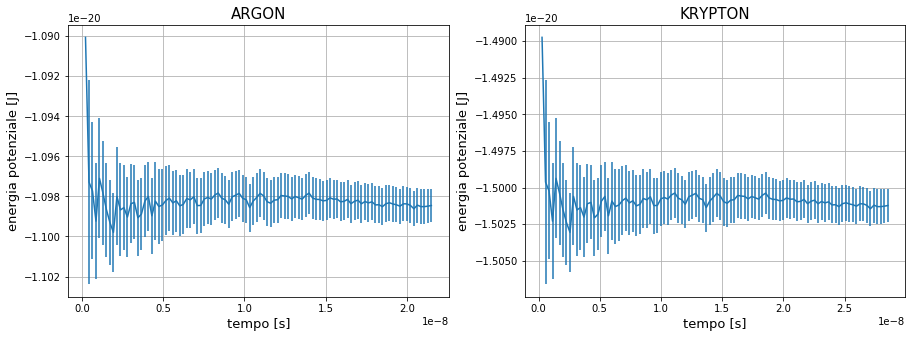

Energia potenziale media per particella (unità ridotte): -6.63 +/- 0.005
Energia potenziale media per particella (Argon): -1.0985E-20 +/- 8E-24 J
Energia potenziale media per particella (Krypton): -1.501E-20 +/- 1E-23 J


In [15]:
# Energia potenziale media per particella vs t: Argon e Krypton
t,U,err_U = np.loadtxt("Solid/Average/epot.txt", usecols=(0,2,3), unpack = 'true')
N = len(t)

f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
plt.errorbar(t*tau_A*100,U*epsilon_A,err_U*epsilon_A)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('energia potenziale [J]',size=13)
plt.title('ARGON',size=15)
plt.grid()

f.add_subplot(1,2,2)
plt.errorbar(t*tau_K*100,U*epsilon_K,err_U*epsilon_K)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('energia potenziale [J]',size=13)
plt.title('KRYPTON',size=15)
plt.grid()

plt.show()

print('Energia potenziale media per particella (unità ridotte):',round(U[N-1],3),'+/-',round(err_U[N-1],3))
print('Energia potenziale media per particella (Argon):',round(d(U[N-1]*epsilon_A),24),'+/-',round(d(err_U[N-1]*epsilon_A),24),'J')
print('Energia potenziale media per particella (Krypton):',round(d(U[N-1]*epsilon_K),23),'+/-',round(d(err_U[N-1]*epsilon_K),23),'J')

### Energia cinetica media per particella

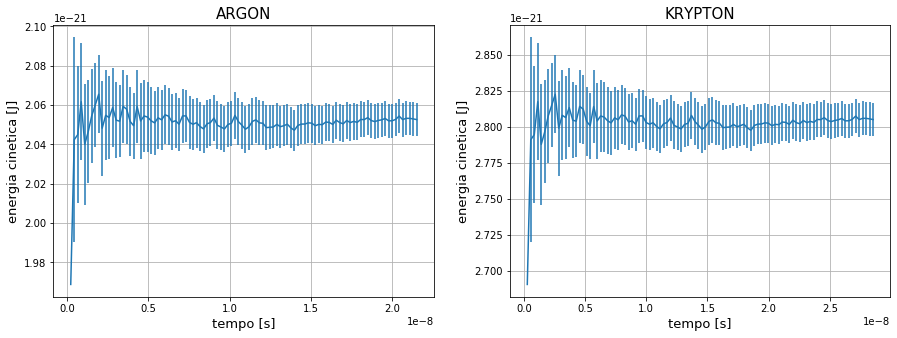

Energia cinetica media per particella (unità ridotte): 1.239 +/- 0.005
Energia cinetica media per particella (Argon): 2.053E-21 +/- 8E-24 J
Energia cinetica media per particella (Krypton): 2.81E-21 +/- 1E-23 J


In [17]:
# Energia cinetica media per particella vs t: Argon e Krypton
t,K,err_K = np.loadtxt("Solid/Average/ekin.txt", usecols=(0,2,3), unpack = 'true')
N = len(t)

f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
plt.errorbar(t*tau_A*100,K*epsilon_A,err_K*epsilon_A)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('energia cinetica [J]',size=13)
plt.title('ARGON',size=15)
plt.grid()

f.add_subplot(1,2,2)
plt.errorbar(t*tau_K*100,K*epsilon_K,err_K*epsilon_K)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('energia cinetica [J]',size=13)
plt.title('KRYPTON',size=15)
plt.grid()

plt.show()

print('Energia cinetica media per particella (unità ridotte):',round(K[N-1],3),'+/-',round(err_K[N-1],3))
print('Energia cinetica media per particella (Argon):',round(d(K[N-1]*epsilon_A),24),'+/-',round(d(err_K[N-1]*epsilon_A),24),'J')
print('Energia cinetica media per particella (Krypton):',round(d(K[N-1]*epsilon_K),23),'+/-',round(d(err_K[N-1]*epsilon_K),23),'J')

### Energia totale media per particella

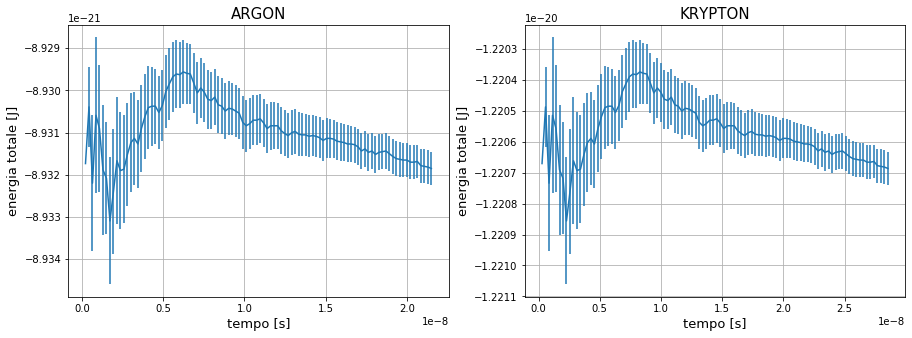

Energia totale media per particella (unità ridotte): -5.3911 +/- 0.0002
Energia totale media per particella (Argon): -8.932E-21 +/- 0E-24 J
Energia totale media per particella (Krypton): -1.221E-20 +/- 0E-23 J


In [18]:
# Energia totale media per particella vs t: Argon e Krypton
t,E,err_E = np.loadtxt("Solid/Average/etot.txt", usecols=(0,2,3), unpack = 'true')
N = len(t)

f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
plt.errorbar(t*tau_A*100,E*epsilon_A,err_E*epsilon_A)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('energia totale [J]',size=13)
plt.title('ARGON',size=15)
plt.grid()

f.add_subplot(1,2,2)
plt.errorbar(t*tau_K*100,E*epsilon_K,err_E*epsilon_K)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('energia totale [J]',size=13)
plt.title('KRYPTON',size=15)
plt.grid()

plt.show()

print('Energia totale media per particella (unità ridotte):',round(E[N-1],4),'+/-',round(err_E[N-1],4))
print('Energia totale media per particella (Argon):',round(d(E[N-1]*epsilon_A),24),'+/-',round(d(err_E[N-1]*epsilon_A),24),'J')
print('Energia totale media per particella (Krypton):',round(d(E[N-1]*epsilon_K),23),'+/-',round(d(err_E[N-1]*epsilon_K),23),'J')

### Temperatura

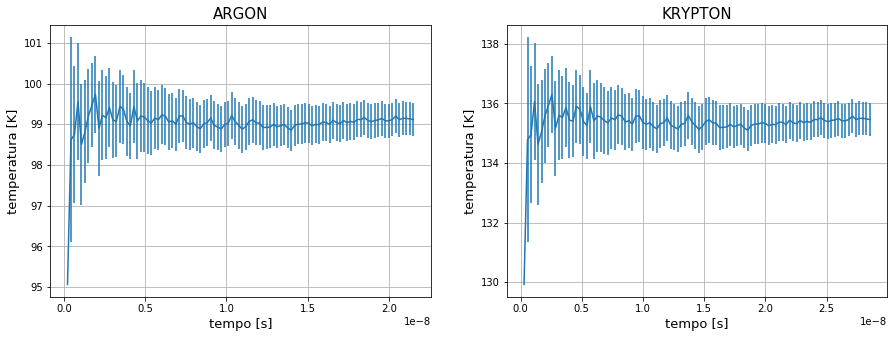

Temperatura (unità ridotte): 0.826 +/- 0.003
Temperatura (Argon): 99.1 +/- 0.4 K
Temperatura (Krypton): 135.5 +/- 0.6 K


In [19]:
# Temperatura vs t: Argon e Krypton
t,T,err_T = np.loadtxt("Solid/Average/temp.txt", usecols=(0,2,3), unpack = 'true')
N = len(t)

f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
plt.errorbar(t*tau_A*100,T*T_A,err_T*T_A)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('temperatura [K]',size=13)
plt.title('ARGON',size=15)
plt.grid()

f.add_subplot(1,2,2)
plt.errorbar(t*tau_K*100,T*T_K,err_T*T_K)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('temperatura [K]',size=13)
plt.title('KRYPTON',size=15)
plt.grid()

plt.show()

print('Temperatura (unità ridotte):',round(T[N-1],3),'+/-',round(err_T[N-1],3))
print('Temperatura (Argon):',round(d(T[N-1]*T_A),1),'+/-',round(d(err_T[N-1]*T_A),1),'K')
print('Temperatura (Krypton):',round(d(T[N-1]*T_K),1),'+/-',round(d(err_T[N-1]*T_K),1),'K')

### Pressione

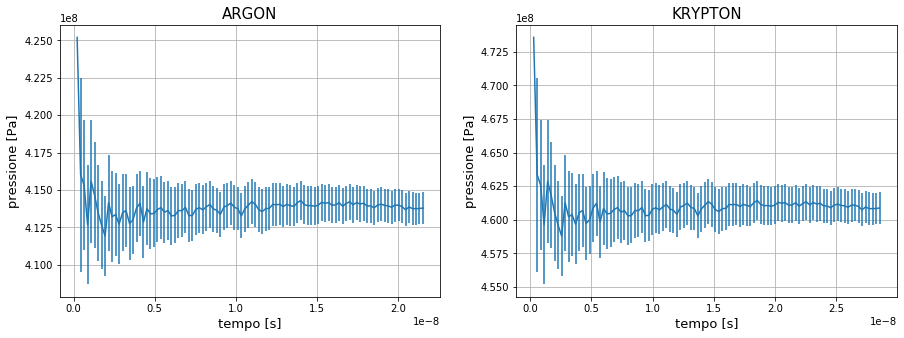

Pressione (unità ridotte): 9.82 +/- 0.03
Pressione (Argon): 413799184 +/- 1054380 Pa
Pressione (Krypton): 460876784 +/- 1174336 Pa


In [20]:
# Pressione vs t: Argon e Krypton
t,P,err_P = np.loadtxt("Solid/Average/pres.txt", usecols=(0,2,3), unpack = 'true')
N = len(t)

f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
plt.errorbar(t*tau_A*100,P*p_A,err_P*p_A)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('pressione [Pa]',size=13)
plt.title('ARGON',size=15)
plt.grid()

f.add_subplot(1,2,2)
plt.errorbar(t*tau_K*100,P*p_K,err_P*p_K)
plt.xlabel('tempo [s]',size=13)
plt.ylabel('pressione [Pa]',size=13)
plt.title('KRYPTON',size=15)
plt.grid()

plt.show()

print('Pressione (unità ridotte):',round(P[N-1],2),'+/-',round(err_P[N-1],2))
print('Pressione (Argon):',round(d(P[N-1]*p_A),0),'+/-',round(d(err_P[N-1]*p_A),0),'Pa')
print('Pressione (Krypton):',round(d(P[N-1]*p_K),0),'+/-',round(d(err_P[N-1]*p_K),0),'Pa')

Infine, plottiamo due grafici dell'energia potenziale, dell'energia cinetica e dell'energia totale istantanee in funzione del tempo (unità naturali) per mostrare come le fluttuazioni dell'energia cinetica e potenziale siano apprezzabili rispetto a quelle dell'energia totale, che rimane costante durante l'intera durata della simulazione. Nel grafico a dx le energie sono state traslate del loro valor medio per poter essere confrontate.

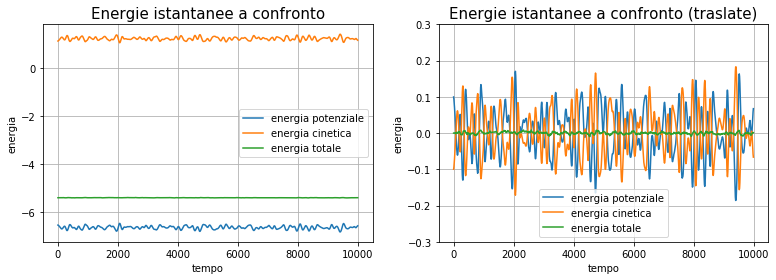

In [125]:
U_insta = np.loadtxt('Solid/Instant/instant_epot.txt',usecols=(0), unpack = 'true')
K_insta = np.loadtxt('Solid/Instant/instant_ekin.txt',usecols=(0), unpack = 'true')
E_insta = np.loadtxt('Solid/Instant/instant_etot.txt',usecols=(0), unpack = 'true')

L = len(U_insta)
t = np.arange(L)

f = plt.figure(figsize=(13,4))
f.add_subplot(1,2,1)
plt.plot(t*10,U_insta,label='energia potenziale')
plt.plot(t*10,K_insta,label='energia cinetica')
plt.plot(t*10,E_insta,label='energia totale')
plt.xlabel('tempo')
plt.ylabel('energia')
plt.title('Energie istantanee a confronto',size=15)
plt.legend()
plt.grid()

f.add_subplot(1,2,2)
plt.plot(t*10,U_insta-U[N-1],label='energia potenziale')
plt.plot(t*10,K_insta-K[N-1],label='energia cinetica')
plt.plot(t*10,E_insta-E[N-1],label='energia totale')
plt.xlabel('tempo')
plt.ylabel('energia')
plt.title('Energie istantanee a confronto (traslate)',size=15)
plt.ylim(-0.3,0.3)
plt.legend()
plt.grid()


plt.show()